# Data Mining Classification

Andrew Esch, Evan Lee, Collin Stratton

Dr. Isac Artzi

CST-425

2/6/2022

# Introduction

The purpose of this project is to apply data mining algorithms to perform classification then provide a clear analysis of the data. This project uses the kNN algorithm and SVM model to classify information about adults.

# Implementation Process

_paragraph about the development_

# KNN Project

In [28]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

## Import data from Adult Data csvfile

In [29]:
# The column names are not included in the .data file so we must create an array of the column names and add them
colnames = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', '50k-Prediction']

# Create a panda dataframe from adult.data and add column names
df = pd.read_csv("adult.data", names=colnames)

# Print out the top 20 instances from the dataframe
print(df.head(20))

    age          workclass  fnlwgt      education  education-num  \
0    39          State-gov   77516      Bachelors             13   
1    50   Self-emp-not-inc   83311      Bachelors             13   
2    38            Private  215646        HS-grad              9   
3    53            Private  234721           11th              7   
4    28            Private  338409      Bachelors             13   
5    37            Private  284582        Masters             14   
6    49            Private  160187            9th              5   
7    52   Self-emp-not-inc  209642        HS-grad              9   
8    31            Private   45781        Masters             14   
9    42            Private  159449      Bachelors             13   
10   37            Private  280464   Some-college             10   
11   30          State-gov  141297      Bachelors             13   
12   23            Private  122272      Bachelors             13   
13   32            Private  205019     Assoc-acd

## Data Preprocessing
Remove duplicate entries in the dataframe and use the .fit_transform() method to fit label

In [30]:
# remove duplicate data rows
df.drop_duplicates()

# label encoder is used to take all of our string data and assign it a unique integer value
le = LabelEncoder()

# use .fit_transform function to fit label
# encoder and return encoded label
# example, male/female will be turned into 0 and 1 for knn to calculate distance from
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native-country'] = le.fit_transform(df['native-country'])
df['50k-Prediction'] = le.fit_transform(df['50k-Prediction'])  # under 50k = 0, over 50k = 1

# print out the top 20 instances from the dataframe to show how LabelEncoder changed our data
print(df.head(20))

    age  workclass  fnlwgt  education  education-num  marital-status  \
0    39          7   77516          9             13               4   
1    50          6   83311          9             13               2   
2    38          4  215646         11              9               0   
3    53          4  234721          1              7               2   
4    28          4  338409          9             13               2   
5    37          4  284582         12             14               2   
6    49          4  160187          6              5               3   
7    52          6  209642         11              9               2   
8    31          4   45781         12             14               4   
9    42          4  159449          9             13               2   
10   37          4  280464         15             10               2   
11   30          7  141297          9             13               2   
12   23          4  122272          9             13            

## Normalize the Data

In [31]:
x = df.drop('50k-Prediction', axis=1)   # all columns except 50k Prediction column (or classifier)
x10000 = x.iloc[:10000,].values         # Set sample amount to first 10000 rows

y = df['50k-Prediction']                # only the 50k Prediction column (or classifier),
y10000 = y.iloc[:10000,].values         # Set sample amount to first 10000 rows

# need to normalize our data so 0/1 values are weighted the same as 0-50 values
# don't need to normalize our y data because it is only 0s and 1s.
print(type(x))
x = preprocessing.scale(x)
print(type(x))
x = pd.DataFrame(x)
print(type(x))
x10000 = preprocessing.scale(x10000)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


## Training
Because KNN is a supervised classifier, split dataset into training set and test set. The X_train and y_train variables will be the 70% of the data, while X_test and y_test will be the 30%. X_train and y_train will create the model, then X_test will be plugged into the model which will produce the prediction for y_test values. Then we will compare the y_prediction values to the y_test values to determine the accuracy. We use x10000 and y10000 because these variables will be used 30 times to calculate the optimal neighbor value, hence we need a smaller training set, so it can run efficiently.

### Data Split and Finding Error

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x10000, y10000, test_size=0.3,random_state=1234)  # 70% training and 30% test


# determine the optimal amount of clusters using an error graph
# the biggest bend in the elbow determines which number of neighbors creates the greatest difference in error reduction
Error = []  # arr to keep track of error percentage for each n value
for n in range(1,31):                               # calculate 30 different error values
    knnData = KNeighborsClassifier(n_neighbors=n)   # Uses KNeighborsClassifier to
    knnData = knnData.fit(X_train,y_train)          # Use train data to create a model
    y_pred = knnData.predict(X_test)                # Predict the y values with x_test values
    Error.append(1-accuracy_score(y_test,y_pred))   # Compare the y_pred values to the y_test actual values to find Error

### Plot Error

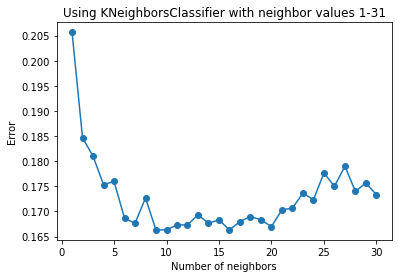

In [33]:
plt.plot(range(1, 31), Error, marker='o')  # Plot the 30 different error calculations
plt.title("Using KNeighborsClassifier with neighbor values 1-31")
plt.xlabel("Number of neighbors")
plt.ylabel("Error")
plt.show()

In [34]:
# print the index/n_neighbor value where the error is the lowest
best_n = Error.index(min(Error))+1
print(f"Lowest Error is with n neighbor value: {best_n}")

Lowest Error is with n neighbor value: 9


## Main KNN Calculations
### Show x and y are full datasets

In [35]:
# should be ~32k instances
print(f"Length of x data = {len(x)}")
print(f"Length of y data = {len(y)}")

Length of x data = 32561
Length of y data = 32561


### Us KFolding to Estimate Optimal K

In [36]:
k = 5  # Do 5 folds, and split the set into 80/20
kfold = KFold(n_splits=k, random_state=1234, shuffle=True)
knnclassifier = KNeighborsClassifier(n_neighbors=best_n)    # Note the use of best_n

acc_score = []

# for loop that calculates the KNeighbors Classifier 5 times using 5 different folds of the training and testing data, then average the results.
for train_index, test_index in kfold.split(x):
     x_train, x_test = x.iloc[train_index,:], x.iloc[test_index,:]
     y_train, y_test = y[train_index], y[test_index]

     knnclassifier.fit(x_train,y_train)
     y_pred = knnclassifier.predict(x_test)

     acc = accuracy_score(y_pred, y_test)
     acc_score.append(acc)

avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.8274220789190849, 0.8329238329238329, 0.8361486486486487, 0.8381449631449631, 0.8356879606879607]
Avg accuracy : 0.8340654968648981


### Create a Confusion Matrix

In [37]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

# Results from confusion matrix:



# ----------------------- what is this ---------------------------- #

print("6922 true positives")
print("1158 true negatives")
print("547 false negatives")
print("1142 false positives")

[[4553  432]
 [ 638  889]]
6922 true positives
1158 true negatives
547 false negatives
1142 false positives


## Results
### Precision
_How correct was the prediction?_

88% salary under 50k
67% salary over 50k
Averaging the two, the chance to identify is 78%, with a weighted 83% chance

### Recall
_A measure of the models' completeness. How many positive cases were found?_

91% of cases were found if salary is less than 50k
58% of cases were found if salary is over 50k
75% average cases found with a weighted 84% rate

### F1 Score
_What percent of positive predictions were correct?_

89% for salary <50k
62% for salary > 50k
Accuracy of 84% to determine if a person has a salary over/under 50k

In [38]:
print(classification_report(y_test,y_pred))
print(f"There are {confusion[1,0]} classification errors.")

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4985
           1       0.67      0.58      0.62      1527

    accuracy                           0.84      6512
   macro avg       0.78      0.75      0.76      6512
weighted avg       0.83      0.84      0.83      6512

There are 638 classification errors.


## KNN Conclusion
_paragraph concluding our findings in the data_

# SVM Project
The setup for this project follows the same steps as the KNN project initially.

## Normalize the Data
### Subset the data into x and y and set the sample amount

In [39]:
n = 1000            # Number of data points to include in the set (x and y vectors)
x = df.iloc[:n,:-1] # all columns except 50k Prediction column (or classifier)
y = df.iloc[:n,-1]  # only the 50k Prediction column (or classifier)

# Data Normalization
x = preprocessing.scale(x)
x = pd.DataFrame(x)

### Data Split and Finding Error
Determine the optimal gamma value using the elbow method to create an error graph. The biggest bend in the elbow determines which number of neighbors creates the greatest difference in error reduction.

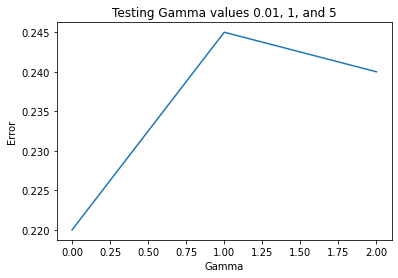

In [40]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1234)  # 70% training and 30% test

gammaError = []             # will keep track of Error percentage for each n value
gammaValues = [0.01, 1, 5]
for g in range(3):          # calculate 3 different error values
    svcData = SVC(kernel='rbf', gamma=gammaValues[g])   # use SVC to model the data with gamma
    svcData = svcData.fit(X_train,y_train)              # use training data to create a model
    y_pred = svcData.predict(X_test)                    # predict the y values with x_test values
    gammaError.append(1-accuracy_score(y_test,y_pred))  # compare the y_pred values to the y_test actual values to find Error

plt.plot(range(3),gammaError) # plot the 3 different error calculations
plt.title("Testing Gamma values 0.01, 1, and 5")
plt.xlabel("Gamma")
plt.ylabel("Error")
plt.show()

Determine the optimal cpenalty value using the elbow method to create an error graph. The biggest bend in the elbow determines which number of neighbors creates the greatest difference in error reduction

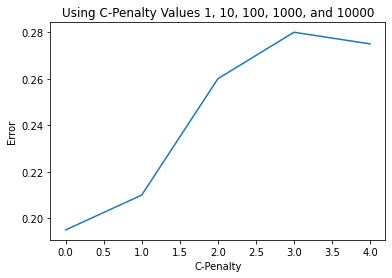

In [41]:
cpenaltyError = []  # keeps track of Error percentage for each n value
cpenaltyValues = [1, 10, 100, 1000, 10000]
for c in range(5):  # calculate 5 different error values
    cpenalty = cpenaltyValues[c]
    svcData = SVC(kernel='rbf', C=cpenalty)                 # use SVC to model the data with cpenalty
    svcData = svcData.fit(X_train,y_train)                  # use training data to create a model
    y_pred = svcData.predict(X_test)                        # predict the y values with x_test values
    cpenaltyError.append(1-accuracy_score(y_test,y_pred))   # compare the y_pred values to the y_test actual values to find Error

plt.plot(range(5),cpenaltyError) # plot the 3 different error calculations
plt.title("Using C-Penalty Values 1, 10, 100, 1000, and 10000")
plt.xlabel("C-Penalty")
plt.ylabel("Error")
plt.show()

### Print the index value where the error is the lowest

In [42]:
best_c = cpenaltyValues[cpenaltyError.index(min(cpenaltyError))]
print(f"Lowest Error is with n neighbor value: {best_c}")

Lowest Error is with n neighbor value: 1


## SVM Calculations
Build KFold Model to split and build model using the best c-penalty and gamma values

    age          workclass  fnlwgt      education  education-num  \
0    39          State-gov   77516      Bachelors             13   
1    50   Self-emp-not-inc   83311      Bachelors             13   
2    38            Private  215646        HS-grad              9   
3    53            Private  234721           11th              7   
4    28            Private  338409      Bachelors             13   
5    37            Private  284582        Masters             14   
6    49            Private  160187            9th              5   
7    52   Self-emp-not-inc  209642        HS-grad              9   
8    31            Private   45781        Masters             14   
9    42            Private  159449      Bachelors             13   
10   37            Private  280464   Some-college             10   
11   30          State-gov  141297      Bachelors             13   
12   23            Private  122272      Bachelors             13   
13   32            Private  205019     Assoc-acd

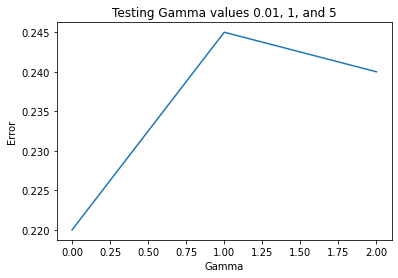

Lowest Error is with n neighbor value: 0.01


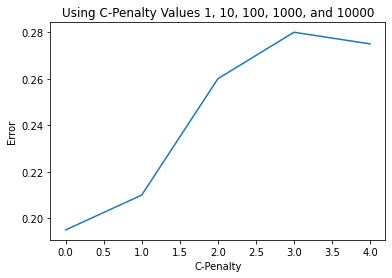

Lowest Error is with n neighbor value: 1

--- GAUSSIAN KERNEL ---

accuracy of each fold - [0.78, 0.85, 0.805, 0.795, 0.79]
Avg accuracy : 0.8039999999999999

CONFUSION MATRIX:

[[149   0]
 [ 42   9]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       149
           1       1.00      0.18      0.30        51

    accuracy                           0.79       200
   macro avg       0.89      0.59      0.59       200
weighted avg       0.84      0.79      0.73       200



KeyError: (slice(None, None, None), 0)

In [43]:
from KNNandSVM.SVM import best_g

k = 5 # do 5 folds and split the set into 80/20
kfold = KFold(n_splits=k, random_state=1234, shuffle=True) # use KFolding using seed, shuffle, and k splits

# create a Gaussian SVC model with the best gamma and cpenalty value
svclassifier = SVC(kernel='rbf', gamma=best_g, C = best_c) # note the use of 'rbf'

acc_score = []

# use a loop to start the k folding method
for train_index, test_index in kfold.split(x):
     x_train, x_test = x.iloc[train_index,:], x.iloc[test_index,:]
     y_train, y_test = y[train_index], y[test_index]

     svclassifier.fit(x_train,y_train)
     y_pred = svclassifier.predict(x_test)

     acc = accuracy_score(y_pred, y_test)
     acc_score.append(acc)

avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

## Create a Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

### Visualize the Results

In [ ]:
import numpy as np

for i in range(0, 14):
     plt.scatter(x[:, i], y, c=y, s=50, cmap='autumn')

     # Setting the 3rd dimension with RBF centered on the middle clump
     r = np.exp(-(x ** 2).sum(1))
     ax = plt.subplot(projection='3d')
     ax.scatter3D(x[:, i], y, r, c=y, s=50, cmap='autumn')
     ax.set_xlabel('x')
     ax.set_ylabel('y')
     ax.set_zlabel('r')
     plt.show()

## Conclusion
_paragraph summarizing SVM project results_

# References
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
https://muthu.co/understanding-the-classification-report-in-sklearn/
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html